In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/All Data.csv')

In [3]:
df.head()

,Date,Difficulty,Price,Volume,Reward,Hash rate,Greenhouse emisssions,Cost to Mine one BTC,Electricity Annualized estimate
0,17-Sep-14,0.0298,457.33,"21,056,800",25.0,0.041899,1.785662,94.976281,3.220125
1,18-Sep-14,0.0298,424.44,"34,483,200",25.0,0.041900,1.821193,96.099940,3.284199
2,19-Sep-14,0.0298,394.8,"37,919,700",25.0,0.041901,1.867237,97.231670,3.367232
3,20-Sep-14,0.0298,408.9,"36,863,600",25.0,0.041902,1.878066,98.151576,3.386759
4,21-Sep-14,0.0298,398.82,"26,580,100",25.0,0.041903,1.887464,98.160853,3.403707


In [4]:
df.columns

Index(['Date', 'Difficulty', 'Price', 'Volume', 'Reward', 'Hash rate',
       'Greenhouse emisssions', 'Cost to Mine one BTC',
       'Electricity Annualized estimate'],
      dtype='object')

In [5]:
df.shape

(3699, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             3699 non-null   object 
 1   Difficulty                       3699 non-null   float64
 2   Price                            3699 non-null   object 
 3   Volume                           3699 non-null   object 
 4   Reward                           3699 non-null   float64
 5   Hash rate                        3699 non-null   float64
 6   Greenhouse emisssions            3699 non-null   float64
 7   Cost to Mine one BTC             3699 non-null   float64
 8   Electricity Annualized estimate  3699 non-null   float64
dtypes: float64(6), object(3)
memory usage: 260.2+ KB


In [6]:
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Volume'] = df['Volume'].str.replace(',', '').astype(float)

# Check the updated data types
print(df.dtypes)

Date                                object
Difficulty                         float64
Price                              float64
Volume                             float64
Reward                             float64
Hash rate                          float64
Greenhouse emisssions              float64
Cost to Mine one BTC               float64
Electricity Annualized estimate    float64
dtype: object


In [7]:
df.describe()

,Difficulty,Price,Volume,Reward,Hash rate,Greenhouse emisssions,Cost to Mine one BTC,Electricity Annualized estimate
count,3699.000000,3699.000000,3.699000e+03,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000
mean,20.201671,18396.967015,1.778596e+10,11.808935,146.623212,31.635618,7985.474016,61.604275
std,25.030737,20188.287518,1.915895e+10,6.881294,183.218220,25.248151,9404.488441,48.775766
min,0.029800,178.100000,5.914570e+06,3.125000,0.041899,1.171533,76.439462,2.161299
25%,0.475700,1182.810000,3.301950e+08,6.250000,3.582500,4.268631,490.744924,8.055886
50%,12.720000,9244.970000,1.412859e+10,12.500000,90.130000,28.015756,4432.611648,58.263142
75%,28.170000,29803.215000,2.880631e+10,12.500000,201.210000,50.823974,12690.728880,97.449967
max,95.670000,73083.500000,3.509679e+11,25.000000,803.750000,91.222935,42705.469110,180.029380


In [8]:
df.isnull().sum()

,0
Date,0
Difficulty,0
Price,0
Volume,0
Reward,0
Hash rate,0
Greenhouse emisssions,0
Cost to Mine one BTC,0
Electricity Annualized estimate,0


In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

In [12]:
df.head()

,Date,Difficulty,Price,Volume,Reward,Hash rate,Greenhouse emisssions,Cost to Mine one BTC,Electricity Annualized estimate
0,2014-09-17,0.0298,457.33,21056800.0,25.0,0.041899,1.785662,94.976281,3.220125
1,2014-09-18,0.0298,424.44,34483200.0,25.0,0.041900,1.821193,96.099940,3.284199
2,2014-09-19,0.0298,394.80,37919700.0,25.0,0.041901,1.867237,97.231670,3.367232
3,2014-09-20,0.0298,408.90,36863600.0,25.0,0.041902,1.878066,98.151576,3.386759
4,2014-09-21,0.0298,398.82,26580100.0,25.0,0.041903,1.887464,98.160853,3.403707


##Correlation Analysis

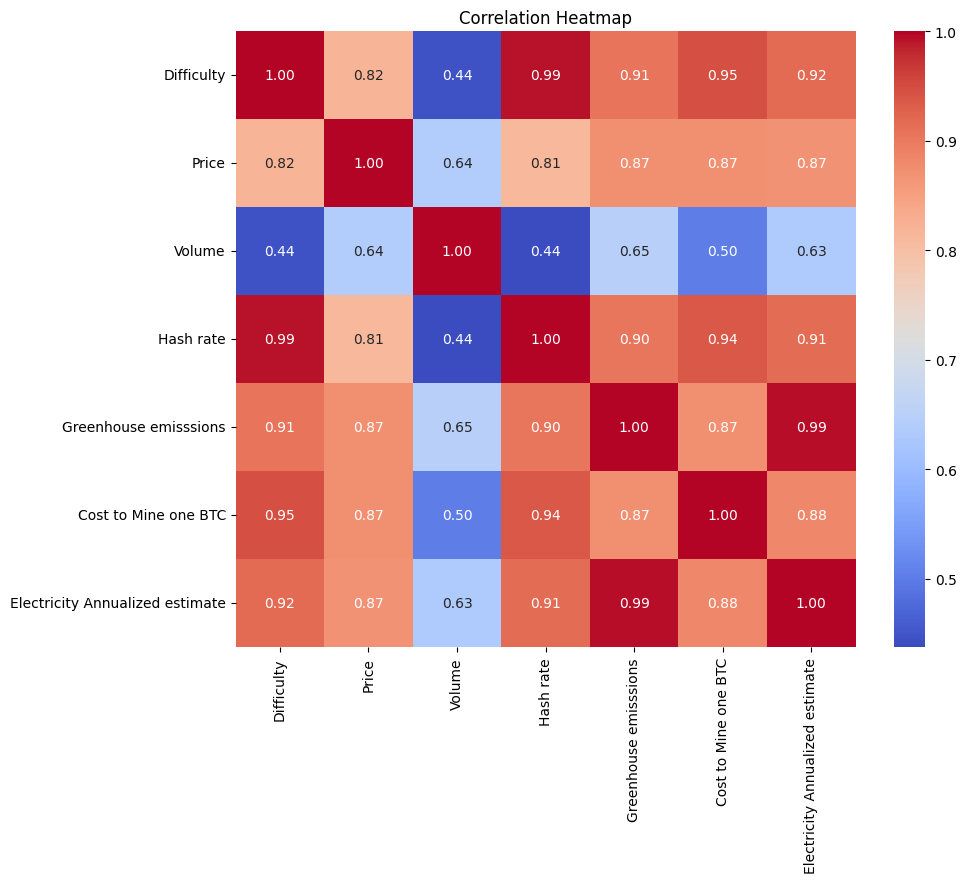

In [39]:
# Correlation Matrix
correlation_matrix = df.drop(columns=["Date","Reward"]).corr()

import seaborn as sns
import matplotlib.pyplot as plt
# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##Regression Analysis

In [13]:
import statsmodels.api as sm

In [14]:
def perform_regression(dependent_var, independent_vars, data):
    X = data[independent_vars]
    X = sm.add_constant(X)  # Add intercept
    y = data[dependent_var]
    model = sm.OLS(y, X).fit()
    return model.summary()

A value close to 0 confirms that the model is statistically significant (rejects the null hypothesis that the independent variable has no explanatory power).

R-squared indicates that percent of the variation in dependent variable is explained by the model using the independent variable

In [16]:
# Model 1: Electricity consumption ~ Difficulty
model_1_summary = perform_regression("Electricity Annualized estimate", ["Difficulty"], df)
model_1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Electricity Annualized estimate   R-squared:                       0.842
Model:                                         OLS   Adj. R-squared:                  0.842
Method:                              Least Squares   F-statistic:                 1.967e+04
Date:                             Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                                     16:00:04   Log-Likelihood:                -16217.
No. Observations:                             3699   AIC:                         3.244e+04
Df Residuals:                                 3697   BIC:                         3.245e+04
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4868      0.410     62.161      0.000      24.683      26.291
Difficulty     1.7878      0.013    140.247      0.000       1.763       1.813
==============================================================================
Omnibus:                      300.697   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.652
Skew:                           0.123   Prob(JB):                     1.88e-23
Kurtosis:                       2.213   Cond. No.                         41.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Model 2: Electricity consumption ~ Price
model_2_summary = perform_regression("Electricity Annualized estimate", ["Price"], df)
model_2_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Electricity Annualized estimate   R-squared:                       0.754
Model:                                         OLS   Adj. R-squared:                  0.754
Method:                              Least Squares   F-statistic:                 1.133e+04
Date:                             Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                                     16:00:45   Log-Likelihood:                -17034.
No. Observations:                             3699   AIC:                         3.407e+04
Df Residuals:                                 3697   BIC:                         3.408e+04
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0097      0.538     42.745      0.000      21.954      24.065
Price          0.0021   1.97e-05    106.439      0.000       0.002       0.002
==============================================================================
Omnibus:                      156.151   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.136
Skew:                           0.079   Prob(JB):                     9.71e-16
Kurtosis:                       2.349   Cond. No.                     3.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# Model 3: Electricity consumption ~ Volume
model_3_summary = perform_regression("Electricity Annualized estimate", ["Volume"], df)
model_3_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Electricity Annualized estimate   R-squared:                       0.402
Model:                                         OLS   Adj. R-squared:                  0.402
Method:                              Least Squares   F-statistic:                     2484.
Date:                             Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                                     16:01:09   Log-Likelihood:                -18676.
No. Observations:                             3699   AIC:                         3.736e+04
Df Residuals:                                 3697   BIC:                         3.737e+04
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.8985      0.846     38.866      0.000      31.239      34.558
Volume      1.614e-09   3.24e-11     49.842      0.000    1.55e-09    1.68e-09
==============================================================================
Omnibus:                      642.533   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10410.327
Skew:                           0.322   Prob(JB):                         0.00
Kurtosis:                      11.193   Cond. No.                     3.57e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Model 4: Electricity consumption ~ Reward
model_4_summary = perform_regression("Electricity Annualized estimate", ["Reward"], df)
model_4_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Electricity Annualized estimate   R-squared:                       0.631
Model:                                         OLS   Adj. R-squared:                  0.631
Method:                              Least Squares   F-statistic:                     6335.
Date:                             Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                                     16:01:36   Log-Likelihood:                -17781.
No. Observations:                             3699   AIC:                         3.557e+04
Df Residuals:                                 3697   BIC:                         3.558e+04
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        128.1207      0.967    132.468      0.000     126.224     130.017
Reward        -5.6327      0.071    -79.595      0.000      -5.771      -5.494
==============================================================================
Omnibus:                       12.623   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.113
Skew:                           0.036   Prob(JB):                      0.00637
Kurtosis:                       2.754   Cond. No.                         27.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Model 5: Electricity consumption ~ Hash rate
model_5_summary = perform_regression("Electricity Annualized estimate", ["Hash rate"], df)
model_5_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Electricity Annualized estimate   R-squared:                       0.837
Model:                                         OLS   Adj. R-squared:                  0.837
Method:                              Least Squares   F-statistic:                 1.900e+04
Date:                             Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                                     16:01:57   Log-Likelihood:                -16271.
No. Observations:                             3699   AIC:                         3.255e+04
Df Residuals:                                 3697   BIC:                         3.256e+04
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8913      0.415     62.441      0.000      25.078      26.704
Hash rate      0.2436      0.002    137.831      0.000       0.240       0.247
==============================================================================
Omnibus:                      270.964   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.102
Skew:                           0.070   Prob(JB):                     3.68e-21
Kurtosis:                       2.231   Cond. No.                         301.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Model 6: Electricity consumption ~ Cost to Mine one BTC
model_6_summary = perform_regression("Electricity Annualized estimate", ["Cost to Mine one BTC"], df)
model_6_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Electricity Annualized estimate   R-squared:                       0.779
Model:                                         OLS   Adj. R-squared:                  0.779
Method:                              Least Squares   F-statistic:                 1.306e+04
Date:                             Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                                     16:02:13   Log-Likelihood:                -16832.
No. Observations:                             3699   AIC:                         3.367e+04
Df Residuals:                                 3697   BIC:                         3.368e+04
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   25.0425      0.494     50.659      0.000      24.073      26.012
Cost to Mine one BTC     0.0046   4.01e-05    114.261      0.000       0.004       0.005
==============================================================================
Omnibus:                       61.130   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.240
Skew:                          -0.306   Prob(JB):                     1.12e-14
Kurtosis:                       3.207   Cond. No.                     1.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Model 7: Greenhouse emissions ~ Difficulty
model_7_summary = perform_regression("Greenhouse emisssions", ["Difficulty"], df)

# Model 8: Greenhouse emissions ~ Price
model_8_summary = perform_regression("Greenhouse emisssions", ["Price"], df)

# Model 9: Greenhouse emissions ~ Volume
model_9_summary = perform_regression("Greenhouse emisssions", ["Volume"], df)

# Model 10: Greenhouse emissions ~ Reward
model_10_summary = perform_regression("Greenhouse emisssions", ["Reward"], df)

# Model 11: Greenhouse emissions ~ Hash rate
model_11_summary = perform_regression("Greenhouse emisssions", ["Hash rate"], df)

# Model 12: Greenhouse emissions ~ Cost to Mine one BTC
model_12_summary = perform_regression("Greenhouse emisssions", ["Cost to Mine one BTC"], df)

# Model 13: Greenhouse emissions ~ Electricity Annualized estimate
model_13_summary = perform_regression("Greenhouse emisssions", ["Electricity Annualized estimate"], df)


print("Model 7 Summary:\n", model_7_summary)
print("\nModel 8 Summary:\n", model_8_summary)
print("\nModel 9 Summary:\n", model_9_summary)

print("Model 10 Summary:\n", model_10_summary)
print("\nModel 11 Summary:\n", model_11_summary)
print("\nModel 12 Summary:\n", model_12_summary)
print("\nModel 13 Summary:\n", model_13_summary)

Model 7 Summary:
                               OLS Regression Results                             
Dep. Variable:     Greenhouse emisssions   R-squared:                       0.823
Model:                               OLS   Adj. R-squared:                  0.823
Method:                    Least Squares   F-statistic:                 1.723e+04
Date:                   Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                           16:04:55   Log-Likelihood:                -13985.
No. Observations:                   3699   AIC:                         2.797e+04
Df Residuals:                       3697   BIC:                         2.799e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

In [24]:
# Model 14: Electricity ~ Multiple independent variables
model_14_summary = perform_regression(
    "Electricity Annualized estimate",
    ["Difficulty", "Price", "Volume", "Reward", "Hash rate", "Cost to Mine one BTC"],
    df,
)

# Model 15: Greenhouse emissions ~ Multiple independent variables
model_15_summary = perform_regression(
    "Greenhouse emisssions",
    ["Difficulty", "Price", "Volume", "Reward", "Hash rate", "Cost to Mine one BTC"],
    df,
)

# Model 16: Greenhouse emissions ~ Electricity Annualized estimate
model_16_summary = perform_regression("Greenhouse emisssions", ["Electricity Annualized estimate"], df)


print("Model 14 Summary:\n", model_14_summary)
print("\nModel 15 Summary:\n", model_15_summary)
print("\nModel 16 Summary:\n", model_16_summary)

Model 14 Summary:
                                    OLS Regression Results                                  
Dep. Variable:     Electricity Annualized estimate   R-squared:                       0.941
Model:                                         OLS   Adj. R-squared:                  0.941
Method:                              Least Squares   F-statistic:                     9819.
Date:                             Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                                     16:05:40   Log-Likelihood:                -14392.
No. Observations:                             3699   AIC:                         2.880e+04
Df Residuals:                                 3692   BIC:                         2.884e+04
Df Model:                                        6                                         
Covariance Type:                         nonrobust                                         
                           coef    std err          t      P>

##Vector Autoregression

In [27]:

from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

Determines the optimal lag length using information criteria like AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion). A good lag length captures dependencies without overfitting.

IRF: Measures how a shock to one variable affects other variables over a specified number of periods

FEVD: Explains how much of a variable’s forecast error variance is due to shocks in its own or other variables over mentioned periods.
Example: How much of the variability in Electricity Annualized estimate is explained by Price or Hash rate.

In [42]:
# Select variables for VAR
variables = [
    "Electricity Annualized estimate",
    "Greenhouse emisssions",
    "Difficulty",
    "Price",
    "Hash rate",
    "Cost to Mine one BTC"
]
df_var = df[variables]


# 1. Fit the VAR Model
model = VAR(df_var) #Initializes the Vector Autoregression model using the selected variables
lag_order = model.select_order(maxlags=20)  # Select optimal lags
print("Selected Lag Order:\n", lag_order.summary())

results = model.fit(lag_order.aic)
print("Summary of VAR Model:\n", results.summary())



Selected Lag Order:
  VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        54.44       54.45   4.389e+23       54.44
1        25.83       25.90   1.649e+11       25.85
2        24.73       24.86   5.505e+10       24.78
3        24.68       24.87   5.218e+10       24.75
4        24.65       24.90   5.072e+10       24.74
5        24.58       24.90   4.745e+10       24.69
6        24.55       24.92   4.589e+10       24.68
7        23.70       24.13   1.955e+10       23.85
8        23.50       23.99   1.602e+10       23.67
9        23.35      23.91*   1.384e+10       23.55
10       23.32       23.94   1.347e+10       23.54
11       23.30       23.98   1.320e+10       23.55
12       23.29       24.03   1.306e+10       23.56
13       23.26       24.06   1.263e+10       23.54
14       23.10       23.96   1.072e+10       23.40
15       23.03       23.95   1.003e+10       23.36
16       2


--------

### Model Structure: The VAR model uses 6 variables and analyzes their relationships over 20 time steps (lags), capturing dependencies across variables over time.

-------
- Lag Order (e.g., L1, L2, etc.): These indicate how far back in time (lag) the model looks to predict the current value of a variable. For instance:
-	L1.Difficulty: Refers to the value of the Difficulty variable one time step (e.g., one day) ago.
-	L2.Price: Refers to the value of the Price variable two time steps ago.
-	Coefficient: The impact of the independent variable (e.g., L1.Difficulty) on the dependent variable (e.g., Electricity Annualized Estimate). A positive coefficient indicates an increase, and a negative coefficient indicates a decrease.
-	Standard Error (std. error): Measures the variability of the coefficient estimate. Smaller values indicate more precise estimates.
-	t-stat: Tests whether the coefficient is significantly different from zero. Higher absolute values (e.g., greater than ~2 for large datasets) indicate statistical significance.
-	Probability (prob): Also known as the p-value, it shows the likelihood that the coefficient is not significantly different from zero. A value below 0.05 generally indicates significance.
-	AIC, BIC, HQIC: These are model selection criteria (Akaike Information Criterion, Bayesian Information Criterion, and Hannan-Quinn Information Criterion). Lower values indicate a better fit for the model.

-------------
- Coefficients:
Represent the change in the dependent variable caused by a one-unit change in the independent variable (at the specific lag) while holding other variables constant.
Example: In the Electricity equation, the coefficient for L1.Electricity Annualized Estimate is 1.302961, meaning that a one-unit increase in electricity consumption at lag 1 increases current electricity consumption by ~1.30 units.
- Standard Error:
Measures the variability of the coefficient estimate. Smaller values indicate more precise estimates.
- t-statistic (t-stat):
The coefficient divided by its standard error. A larger absolute value indicates that the variable is more statistically significant.
- p-value (prob):
Indicates whether the coefficient is statistically significant:

-----------
Implications:

-The VAR model generates separate equations for each variable, modeling it as a function of its own lagged values and the lagged values of other variables.
- The L1 (Lag 1) coefficient for Electricity Annualized Estimate is 1.302575, with a very small p-value (0.000). This means that the most recent value of “Electricity Annualized Estimate” has a strong and significant positive impact on its current value.


In [34]:

# Forecast for 30 steps ahead
forecast = results.forecast(df_var.values[-lag_order.aic:], steps=30)
forecast_df = pd.DataFrame(forecast, columns=df_var.columns)
print("30-Step Ahead Forecast:\n", forecast_df)


30-Step Ahead Forecast:
     Electricity Annualized estimate  Greenhouse emisssions  Difficulty  \
0                        176.310931              89.470771   96.732608   
1                        174.812188              88.642814   98.107538   
2                        171.746442              86.935500   99.358857   
3                        171.470577              86.795388  100.380691   
4                        167.479231              84.843090  101.004526   
5                        166.511656              84.461565  101.566039   
6                        165.990437              84.240309  102.294980   
7                        165.924490              84.273305  102.936059   
8                        165.375100              84.017768  103.271903   
9                        165.292973              84.097686  103.561285   
10                       164.876641              83.877297  103.764326   
11                       165.430129              84.108415  103.858085   
12           

##Causality Test

In [45]:
# Preprocess the DataFrame to ensure only numeric columns
numeric_df = df.select_dtypes(include=["number"])  # Keep only numeric columns

def granger_causality_matrix(data, maxlag=5):
    """
    Perform Granger causality tests for all pairs of variables in the dataset.
    """
    variables = data.columns
    causality_matrix = pd.DataFrame(index=variables, columns=variables)

    for col_x in variables:
        for col_y in variables:
            if col_x != col_y:  # Avoid testing causality of a variable on itself
                test_result = grangercausalitytests(data[[col_x, col_y]], maxlag=maxlag, verbose=False)
                # Extract p-value for the best lag
                p_values = [round(test_result[lag][0]['ssr_chi2test'][1], 4) for lag in range(1, maxlag+1)]
                min_p_value = min(p_values)
                causality_matrix.loc[col_y, col_x] = min_p_value
            else:
                causality_matrix.loc[col_y, col_x] = "N/A"

    return causality_matrix

# Run Granger causality tests on numeric data
granger_matrix = granger_causality_matrix(numeric_df, maxlag=5)

# Display results
print("Granger Causality Matrix:")
print(granger_matrix)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

Granger Causality Matrix:
                                Difficulty   Price Volume  Reward Hash rate  \
Difficulty                             N/A  0.0005    0.0  0.2694       0.0   
Price                               0.0083     N/A    0.0  0.3984       0.0   
Volume                              0.7922     0.0    N/A  0.0807    0.0498   
Reward                              0.8713  0.1108    0.0     N/A    0.0001   
Hash rate                              0.0     0.0    0.0  0.2563       N/A   
Greenhouse emisssions                  0.0  0.0011    0.0  0.1373       0.0   
Cost to Mine one BTC                   0.0  0.0402    0.0  0.4739       0.0   
Electricity Annualized estimate        0.0  0.0009    0.0  0.1158       0.0   

                                Greenhouse emisssions Cost to Mine one BTC  \
Difficulty                                     0.0097                  0.0   
Price                                          0.0112                  0.0   
Volume                      

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


- Columns represent the independent variables (predictors).
-	Rows represent the dependent variables (predicted).
-	Each cell contains the minimum p-value across the tested lags for Granger causality between the corresponding variables.
-	Small p-value (< 0.05): Indicates that the column variable Granger-causes the row variable.
-	N/A: Indicates that Granger causality is not applicable (e.g., a variable tested against itself).


